# PLAsTiCC Astronomical Classification

In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

metadata = pandas.read_csv("../Data/training_set_metadata.csv",sep=',',decimal=b'.')
data = pandas.read_csv("../Data/training_set.csv",sep=',',decimal=b'.')

## Metadata

**object_id** : 

**ra** :

**decl** :

**gal_l** :

**gal_b** :

**ddf** :

**hostgal_specz** :

**hostgal_photoz** :

**hostgal_photoz_err** :

**distmod** :

**mwebv** :

**target** :

In [15]:
metadata.head()
#metadata.info()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


## Data

**object_id** : 

**mjd** : 

**passband** : int[0,5],  numéro de la bande-passante (ou filtre). On a par exemple UV, IR, visible...

**flux** : 

**flux_err** :

**detected** : 

In [17]:
data.head(15)

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
5,615,59752.4147,1,-1061.457031,6.472994,1
6,615,59752.4224,3,-524.954590,3.552751,1
7,615,59752.4334,4,-393.480225,3.599346,1
8,615,59752.4435,5,-355.886780,10.421921,1
9,615,59767.2968,2,-548.013550,3.462291,1


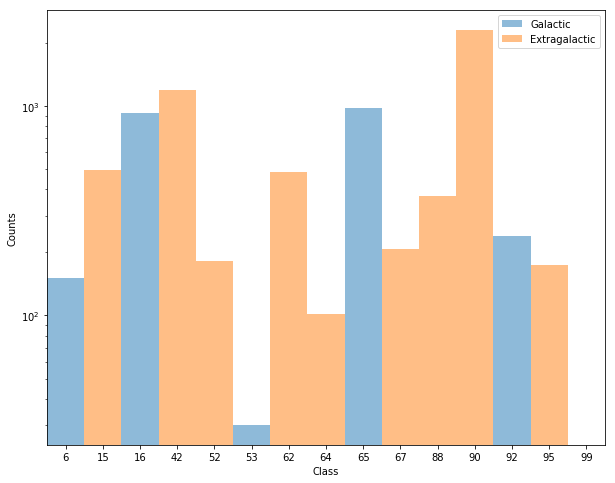

In [6]:
targets = np.hstack([np.unique(metadata['target']), [99]])
target_map = {j:i for i, j in enumerate(targets)}
target_ids = [target_map[i] for i in metadata['target']]
metadata['target_id'] = target_ids

galactic_cut = metadata['hostgal_specz'] == 0
plt.figure(figsize=(10, 8))
plt.hist(metadata[galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Galactic')
plt.hist(metadata[~galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Extragalactic')
plt.xticks(np.arange(15)+0.5, targets)
plt.gca().set_yscale("log")
plt.xlabel('Class')
plt.ylabel('Counts')
plt.xlim(0, 15)
plt.legend();
